# Opružno njihalo

Problem koji nam se postavlja je opisati njihanje čestice na opruzi. Dopuštamo da tijelo ima proizvoljne početne uvjete položaja <br> te brzine, isto tako masa tijela je proizvoljna kao i konstanta elastičnosti opruge.<br>

Valja primjetiti da smo zanemarili dimenzije tijela koje se njiše te bilo kakve vanjske utjecaje (npr. otpor zraka), osim gravitacije. 
<br>
<br>
<br>

## Fizika problema

Postavimo koordinatni sustav tako da njegovo ishodište leži u točki objesišta opruge. <br>
x-os postavljamo paralelno s tlom s pozitivnim smjerom u desno <br>
y-os postavljamo okomito na tlo s pozitiivnim smjerom prema gore

### Sile na tijelo i jednadžbe gibanja
U y smjeru djeluje gravitacija, dok u radijalnom smjeru imamo doprinos opruge:

$$F_{g}=-mg\hat{y} $$
$$F_{el}=-K(r-L)\hat{r}$$

Očito je da ta ta dva doprinosa nisu zapisana u istim koordinatnim sustavima pa ćemo morati prilagoditi silu opruge kartezijevim koordinatama.

Za početak promotrimo čemu su jednaki $r$ te $\hat{r}$ <br>
($r$ je duljina opruge u nekom trenutku, a $\hat{r}$ jedinični vektor u smjeru pružanja opruge)

$$r=\sqrt{x^2+y^2} $$
$$\hat{r}=\frac{x}{\sqrt{x^2+y^2}}\hat{x}+
\frac{y}{\sqrt{x^2+y^2}}\hat{y}$$

Sada kad smo sve sile raspisali u kartezijevim koordinatama možemo postaviti jednadžbe gibanja pomoću Newtona te ih razdvojiti
na dva <br>
nezavisna smjera, nakon djeljenja s masom dobivamo ove izraze:

$$\hat{x}: \frac{d^2 x}{d t^2}=\frac{K}{m}\left(\frac{L}{\sqrt{x^2+y^2}}-1\right)x$$
$$\hat{y}: \frac{d^2 x}{d t^2}=\frac{K}{m}\left(\frac{L}{\sqrt{x^2+y^2}}-1\right)y-g $$

x, y su koordinate tijela u nekom trenutku <br>
m je masa tijela <br>
K je konstanta elastičnosti opruge <br>
L je duljina nerastegnute opruge <br>
g je ubrzanje sile teže <br>

Zadajmo sad te početne uvjete, no još nam je potrebno ubaciti početne brzine u x i y smjeru. <br>
Zadajemo i vrijeme promatranja sustava.

In [28]:
K=30
L=1
m=7
X0=0
Y0=-1
Vx0=2
Vy0=0
t=30
g=9.81

In [29]:
#implementacija svih paketa 
from scipy import *
from scipy.integrate import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Problem koji imamo je diferencijala jednadžba drugog reda, da bi je mogli riješiti numerički pomoću pythona, moramo je svesti na dvije diferencijalne jednadžbe prvog reda što je učinjeno na sljedeći način. Svođenjem će nam se pojaviti i prva derivacija položaja što je ujedno i njegova brzina.

In [30]:
def funkcija(lista, t):
    X=lista[0]
    Y=lista[1]
    Vx=lista[2]
    Vy=lista[3]
    konst=K*(L/sqrt(X**2+Y**2)-1)/m
    Ax=X*konst
    Ay=Y*konst-g
    return [lista[2],lista[3],Ax,Ay]
    
uvjeti=[X0,Y0,Vx0,Vy0]
vrijeme=np.linspace(0,t,1000)
solve=odeint(funkcija,uvjeti,vrijeme)

## Graf ovisnosti koordinate y o koordinati x

Text(0,0.5,'$y$')

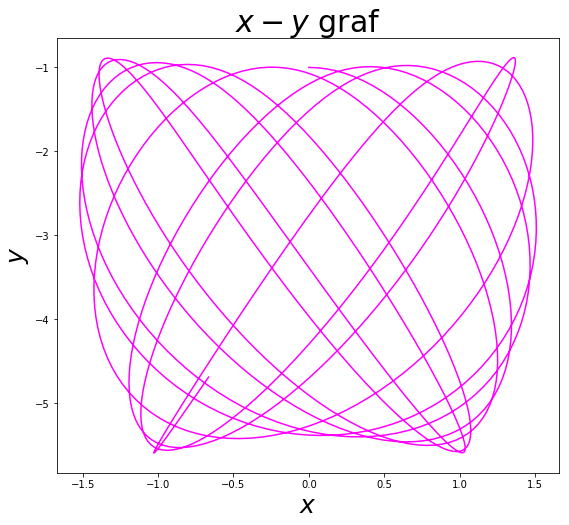

In [31]:
fig,ax=plt.subplots(figsize=[9,8])
ax.plot(solve[:,0],solve[:,1],color="magenta")
ax.set_title('$x-y$ graf',fontsize=30)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

## Graf ovisnosti brzine u y smjeru  o brzini u x smjeru

Text(0,0.5,'$v_{y}$')

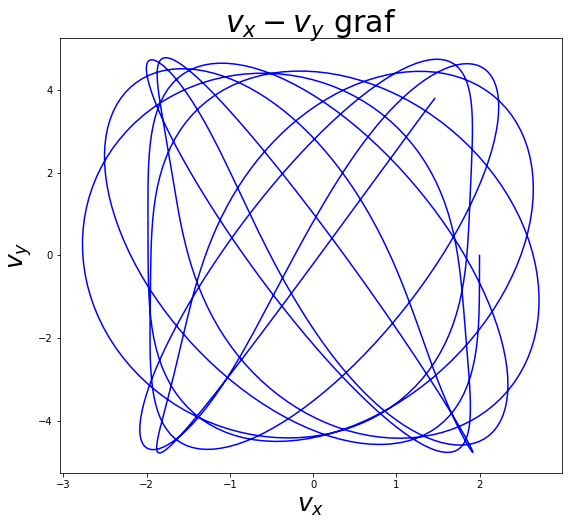

In [32]:
fig,ax=plt.subplots(figsize=[9,8])
ax.plot(solve[:,2],solve[:,3],color="blue")
ax.set_title('$v_{x}-v_{y}$ graf',fontsize=30)
ax.set_xlabel('$v_{x}$',fontsize=25) 
ax.set_ylabel('$v_{y}$',fontsize=25)

## Graf ovisnosti brzine u x smjeru o koordinati x

Text(0,0.5,'$v_{x}$')

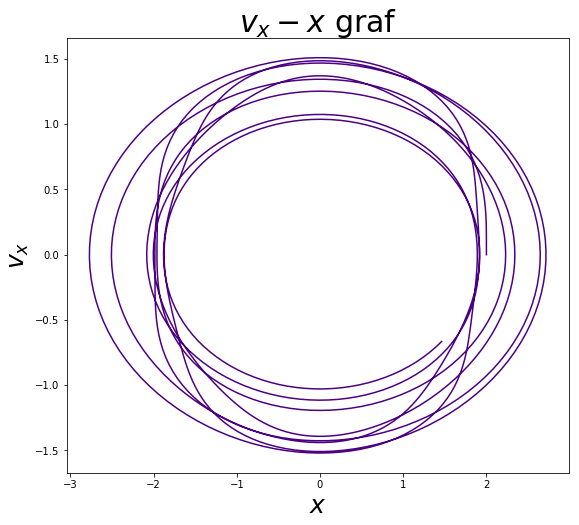

In [33]:
fig,ax=plt.subplots(figsize=[9,8])
ax.plot(solve[:,2],solve[:,0],color="indigo")
ax.set_title('$v_{x}-x$ graf',fontsize=30)
ax.set_xlabel('$x$',fontsize=25) 
ax.set_ylabel('$v_{x}$',fontsize=25)

## Graf ovisnosti brzine u y smjeru o koordinati y

Text(0,0.5,'$v_{y}$')

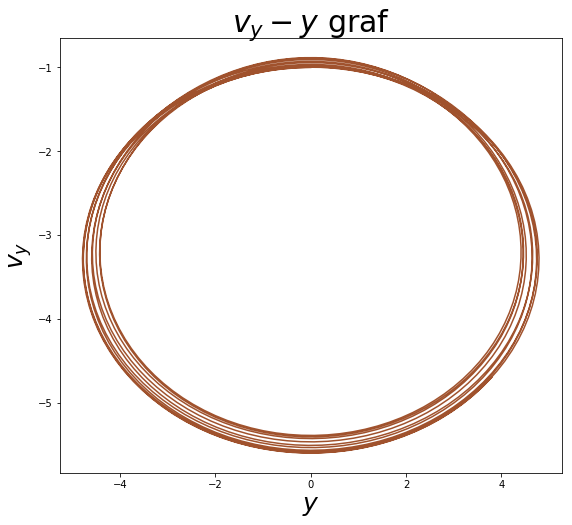

In [34]:
fig,ax=plt.subplots(figsize=[9,8])
ax.plot(solve[:,3],solve[:,1],color="sienna")
ax.set_title('$v_{y}-y$ graf',fontsize=30)
ax.set_xlabel('$y$',fontsize=25)
ax.set_ylabel('$v_{y}$',fontsize=25)

## Graf ovisnosti koordinata x, y o vremenu

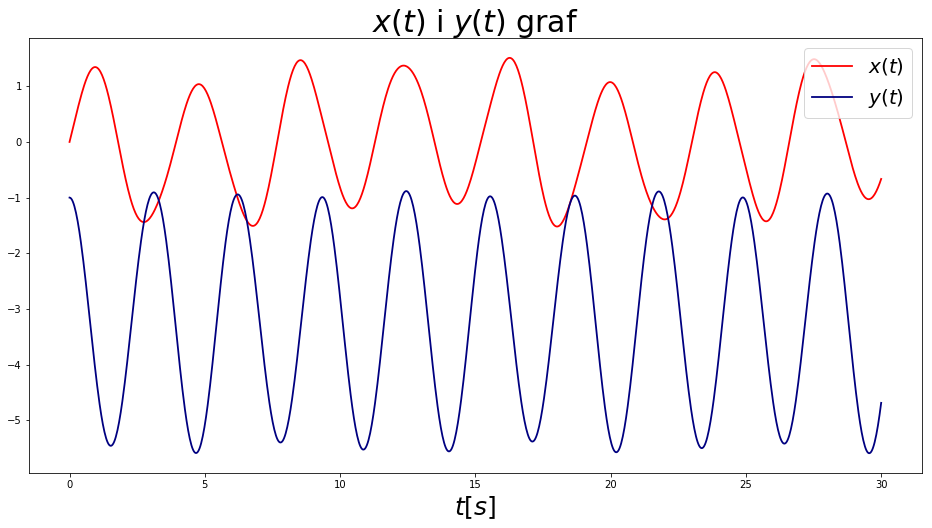

In [35]:
fig, ax = plt.subplots(figsize=[16,8])
ax.plot(vrijeme,solve[:,0],label='$x(t)$',color="red",linewidth=1.8)
ax.plot(vrijeme,solve[:,1],label='$y(t)$',color="navy",linewidth=1.8)
ax.set_title('$x(t)$ i $y(t)$ graf',fontsize=30)
ax.set_xlabel('$t[s]$', fontsize=25)
ax.legend(loc="upper right",prop={'size': 20})

## Graf ovisnosti brzina u  x, y smjeru o vremenu

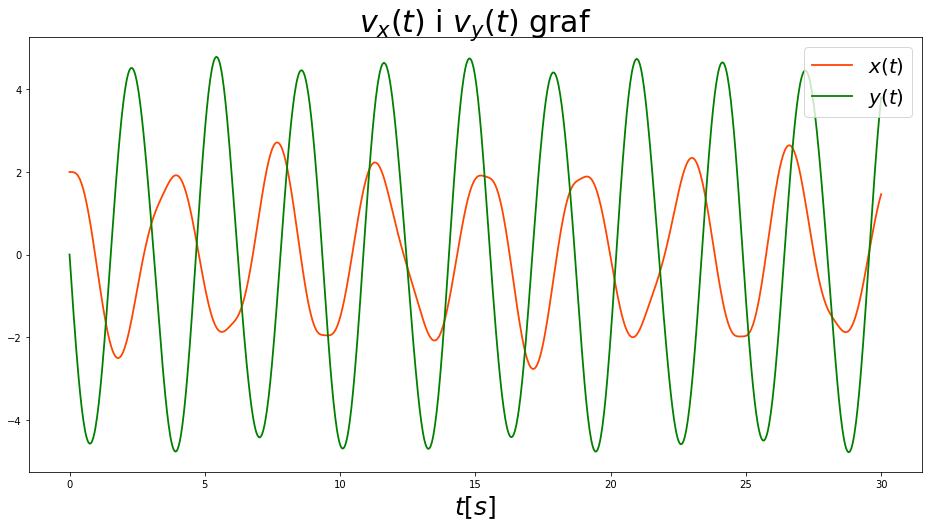

In [36]:
fig, ax = plt.subplots(figsize=[16,8])
ax.plot(vrijeme,solve[:,2],label='$x(t)$',color="orangered",linewidth=1.8)
ax.plot(vrijeme,solve[:,3],label='$y(t)$',color="green",linewidth=1.8)
ax.set_title('$v_{x}(t)$ i $v_{y}(t)$ graf',fontsize=30)
ax.set_xlabel('$t[s]$', fontsize=25)
ax.legend(loc="upper right",prop={'size': 20})